## EX 3: Plot classification probability

這個範例的主要目的
* 使用iris 鳶尾花資料集
* 測試不同分類器對於涵蓋特定範圍之資料集，分類為那一種鳶尾花的機率
* 例如：sepal length 為 4cm 而 sepal width 為 3cm時被分類為 versicolor的機率

## (一)資料匯入及描述
* 首先先匯入iris 鳶尾花資料集，使用`iris = datasets.load_iris()`將資料存入
* 準備X (特徵資料) 以及 y (目標資料)，僅使用兩個特徵方便視覺呈現

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # 僅使用前兩個特徵，方便視覺化呈現
y = iris.target

n_features = X.shape[1]

* `iris`為一個dict型別資料，我們可以用以下指令來看一下資料的內容。

In [ ]:
for key,value in iris.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

| 顯示 | 說明 |
| -- | -- |
| ('target_names', (3L,))| 共有三種鳶尾花 setosa, versicolor, virginica |
| ('data', (150L, 4L)) | 有150筆資料，共四種特徵 |
| ('target', (150L,))| 這150筆資料各是那一種鳶尾花|
| DESCR | 資料之描述 |
| feature_names| 四個特徵代表的意義 |

## (二) 分類器的選擇
這個範例選擇了四種分類器，存入一個dict資料中，分別為：
1. L1 logistic
2. L2 logistic (OvR)
3. Linear SVC
4. L2 logistic (Multinomial)

其中`LogisticRegression` 並不適合拿來做多目標的分類器，我們可以用結果圖的分類機率來觀察。

In [14]:
C = 1.0

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'
                )}

n_classifiers = len(classifiers)

而接下來為了產生一個包含絕大部份可能的測試矩陣，我們會用到以下指令。
1. `np.linspace(起始, 終止, 數量)` 目的為產生等間隔之數據，例如`print(np.linspace(1,3,3))` 的結果為 `[ 1.  2.  3.]`，而`print(np.linspace(1,3,5))`的結果為 `[ 1.   1.5  2.   2.5  3. ]`
2. `np.meshgrid(xx,yy)`則用來產生網格狀座標。
3. `numpy.c_` 為numpy特殊物件，能協助將numpy 陣列連接起來，將程式簡化後，我們用以下範例展示相關函式用法。

```python
xx, yy = np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3).T)
Xfull = np.c_[xx.ravel(), yy.ravel()]
print('xx= \n%s\n' % xx)
print('yy= \n%s\n' % yy)
print('xx.ravel()= %s\n' % xx.ravel())
print('Xfull= \n%s' % Xfull)
```
結果顯示如下，我們可以看出Xfull模擬出了一個類似特徵矩陣X, 具備有9筆資料，這九筆資料重現了xx (3種數值變化)及yy(3種數值變化)的所有排列組合。
```
xx= 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

yy= 
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

xx.ravel()= [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]

Xfull= 
[[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]
```
而下面這段程式碼的主要用意，在產生一個網格矩陣，其中xx,yy分別代表著`iris`資料集的第一及第二個特徵。xx 是3~9之間的100個連續數字，而yy是1~5之間的100個連續數字。用`np.meshgrid(xx,yy)`及`np.c_`產生出Xfull特徵矩陣，10,000筆資料包含了兩個特徵的所有排列組合。

In [ ]:
plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

## (三) 測試分類器以及畫出機率分佈圖的選擇
接下來的動作
1. 用迴圈輪過所有的分類器，並計算顯示分類成功率
2. 將`Xfull`(10000x2矩陣)傳入 `classifier.predict_proba()`得到`probas`(10000x3矩陣)。這裏的`probas`矩陣是10000種不同的特徵排列組合所形成的數據，被分類到三種iris 鳶尾花的可能性。
3. 利用`reshape((100,100))`將10000筆資料排列成二維矩陣，並將機率用影像的方式呈現出來

classif_rate for L2 logistic (OvR) : 76.666667 
classif_rate for L1 logistic : 79.333333 
classif_rate for Linear SVC : 82.000000 
classif_rate for L2 logistic (Multinomial) : 82.000000 


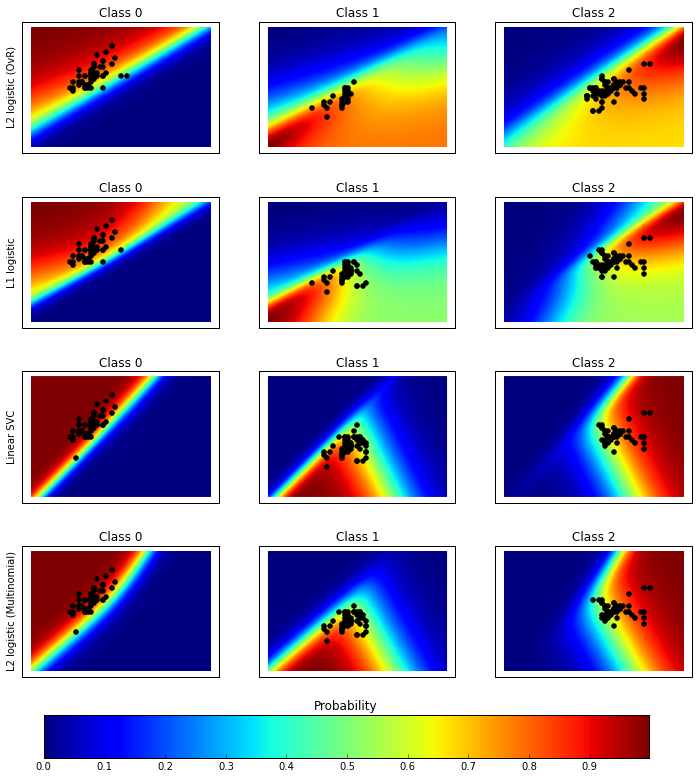

In [32]:
#若在ipython notebook (Jupyter) 裏執行，則可以將下列這行的井號移除
%matplotlib inline
#原範例沒有下列這行，這是為了讓圖形顯示更漂亮而新增的
fig = plt.figure(figsize=(12,12), dpi=300) 

for index, (name, classifier) in enumerate(classifiers.items()):
    #訓練並計算分類成功率
    #然而此範例訓練跟測試用相同資料集，並不符合實際狀況。
    #建議採用cross_validation的方式才能較正確評估
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

## (四)完整程式碼

Python source code: plot_classification_probability.py

http://scikit-learn.org/stable/_downloads/plot_classification_probability.py
```python
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 1.0

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'
                )}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()
```